In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Nous allons commencer par afficher une représentation globale de notre dataset. 
Avec la méthode .head(), nous affichons les premières lignes du dataset, pour mieux comprendre comment sont réparties les données ainsi que le apparence.

Avec la méthode .describe() nous pouvons obtenir des statistiques du dataset pour chaque colonne telles que la moyenne ou l'écart-type qui nous aident à mieux appréhender nos données.

Pour finir nous affichons la liste du nom de toutes les colonnes du dataset, afin de mieux les visualiser.

In [2]:
cars = pd.read_csv('cars.csv')
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [4]:
cars = cars.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)

In [5]:
list(cars.columns)  #Pour afficher la listes de toutes les colonnes du dataset

['manufacturer_name',
 'model_name',
 'transmission',
 'color',
 'odometer_value',
 'year_produced',
 'engine_fuel',
 'engine_has_gas',
 'engine_type',
 'engine_capacity',
 'body_type',
 'has_warranty',
 'state',
 'drivetrain',
 'price_usd',
 'is_exchangeable',
 'location_region',
 'number_of_photos',
 'up_counter',
 'duration_listed']

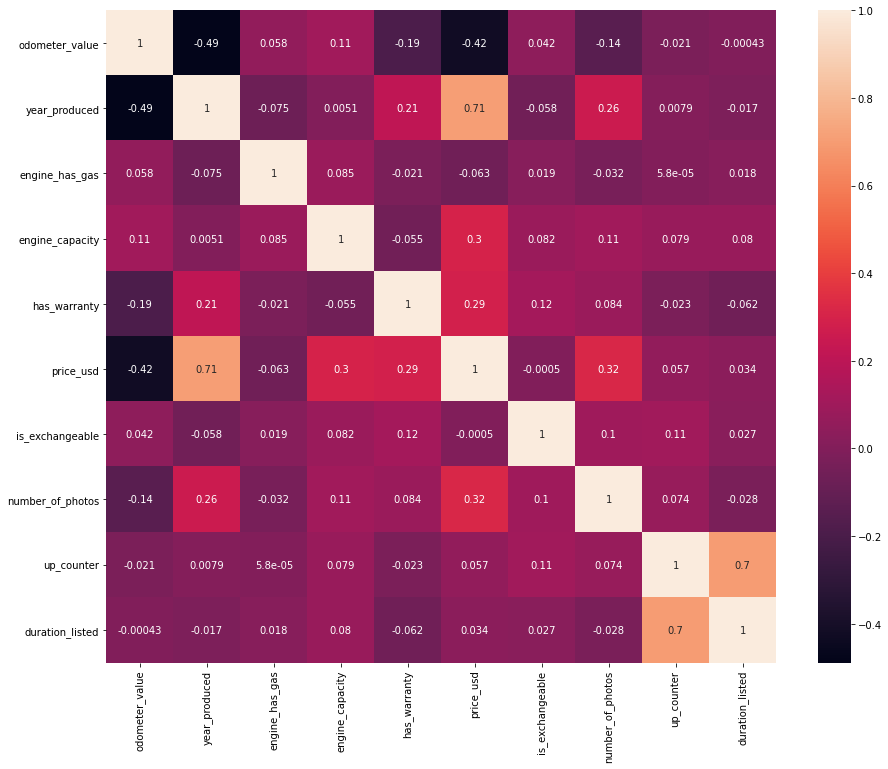

In [6]:
correlation = cars.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True)
plt.show()

Nous allons ensuite nous intéresser à la colonne correspondant au type de carrosserie.
Notre premier histogramme nous montre la répartition des différents types de corps parmis tous les véhicules du dataset. Nous pouvons remarquer que la grande majorité des véhicules sont des sédans. Le nombre de limousines présentes peut être considéré comme infime. Il y a également très peu de pickup et de cabriolets dans notre dataset.

Notre deuxième histogramme nous donne le prix moyen d'un véhicule selon son type de corps. Etonnament, les suvs sont les véhicules possèdant les prix les plus élevés, avec une moyenne atteignant presque 14000 usd. Le hatchback, le deuxième type de véhicule le plus présent dans notre dataset est lui le moins cher, atteignant un prix moyen de 4000 usd.

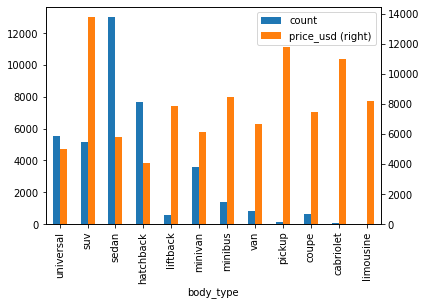

In [7]:
col = cars.body_type
c = Counter(col)
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['body_type','count']).set_index('body_type')
prix = pd.DataFrame(cars.groupby(['body_type'])['price_usd'].mean())
df = pd.concat([freq, prix], axis=1, join='inner')

df.plot( kind= 'bar' , secondary_y= 'price_usd')

plt.show()

Les histogrammes suivants concernent la colonne manufacturer_name, c'est à dire le nom du constructeur ou la marque.
Tout comme pour le type de corps, nous commençons par regarder la répartition des marques des véhicules dans notre dataset. Nous pouvons remarquer que la marque volkswagen est la plus présente dans le dataset, atteignant plus de 4000. De plus, seulement une vingtaine de marques sur 55 ont une quantité conséquente, au dessus de 500.

De même, le deuxième histogramme affiche le prix moyen de chaque marque. Les véhicules de la marque Renault sont celles ayant le prix le plus élevé. Nous pouvons remarquer que certaines marques ayant très peu d'exemplaires ont un prix plus élevé, telle que la Jaguar, atteignant une moyenne de 17500 usd (juste en dessous des Renaults) pour une quantité d'environ 100.

Pour faciliter la lecture, nous avons trié le nom des marques par ordre alphabétique dans les 2 histogrammes.

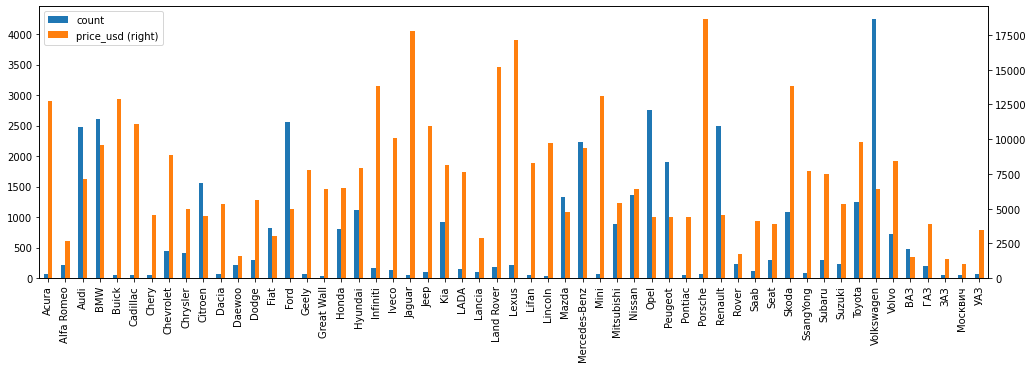

In [30]:
#trier par prix moyen

col = cars.manufacturer_name
c = Counter(col)
#tri par ordre alphabétique
c = dict( sorted(c.items(), key=lambda x: x[0]))
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['manifacturer_name','count']).set_index('manifacturer_name')
prix = pd.DataFrame(cars.groupby(['manufacturer_name'])['price_usd'].mean())
df = pd.concat([freq, prix], axis=1, join='inner')

df.plot(kind= 'bar' , secondary_y= 'price_usd', figsize=(17,5))

plt.show()

Nous nous intéressons ici à la colonne de transmission. Nous pouvons remarquer ici que la transmission méchanique est bien plus présente dans notre dataset, bien que le prix de la transmission automatique soit en moyenne deux fois plus élevé que la transmission méchanique.

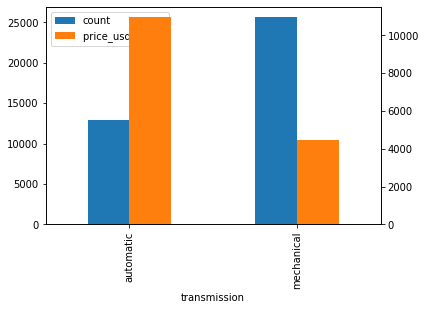

In [32]:
col = cars.transmission
c = Counter(col)
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['transmission','count']).set_index('transmission')
prix = pd.DataFrame(cars.groupby(['transmission'])['price_usd'].mean())
df = pd.concat([freq, prix], axis=1, join='inner')

df.plot(kind= 'bar' , secondary_y= 'price_usd')

plt.show()

Text(0.5, 1.0, 'Prix moyen par type de transmission')

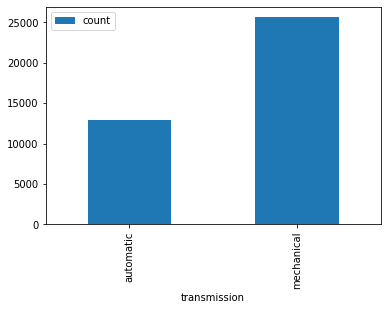

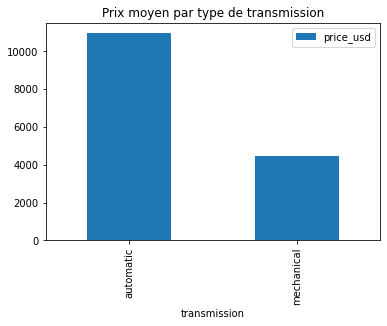

In [11]:
col = cars.transmission
c = Counter(col)
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['transmission','count']).set_index('transmission')
freq.plot.bar()

df = pd.DataFrame(cars.groupby(['transmission'])['price_usd'].mean())
df.plot.bar()
plt.title('Prix moyen par type de transmission')

Pour les deux histogrammes suivants, nous nous intéressons à la colonne engine_fuel, le carburant. Nous pouvons remarquer que le caburant le plus commun est en premier le gasoil puis le diesel. La quantité de véhicules utilisant les autres types de carburants peut être considéré comme infime.

Nous pouvons remarquer que les véhicules utilisant un carburant peu commun ont également un prix moyen plus élevé. C'est notamment le cas pour les véhicules électriques dont la quantité est infime mais le prix le plus élevé. Les véhicules utilisant les carburants les plus répandus comme le gasoil n'ont pas un prix élevé.

Pour faciliter la lecture, nous avons trié le nom des carburants par ordre alphabétique dans les 2 histogrammes.
Nous considéront que le gas et le gasoil représentent la même valeur.

Text(0.5, 1.0, 'Prix moyen par carburant')

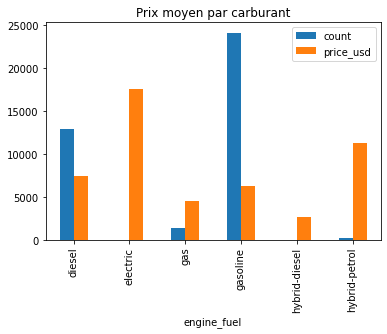

In [12]:
col = cars.engine_fuel
c = Counter(col)
c = dict( sorted(c.items(), key=lambda x: x[0].lower()) )
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['engine_fuel','count']).set_index('engine_fuel')

df = pd.DataFrame(cars.groupby(['engine_fuel'])['price_usd'].mean())

result = pd.concat([freq, df], axis=1, join='inner')
result.plot.bar()
plt.title('Prix moyen par carburant')

Text(0.5, 1.0, 'Prix moyen par carburant')

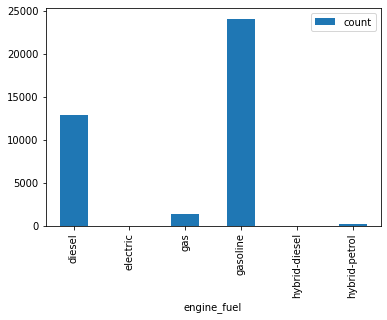

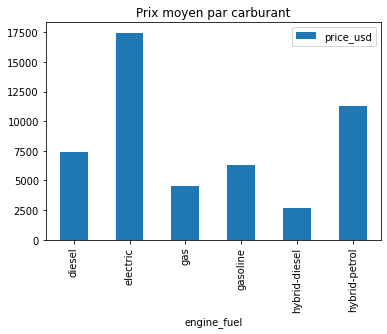

In [13]:
col = cars.engine_fuel
c = Counter(col)
c = dict( sorted(c.items(), key=lambda x: x[0].lower()) )
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['engine_fuel','count']).set_index('engine_fuel')
freq.plot.bar()

df = pd.DataFrame(cars.groupby(['engine_fuel'])['price_usd'].mean())
df.plot.bar()
plt.title('Prix moyen par carburant')

Nous allons ensuite étudier la colonne concernant la couleur des véhicules. Nous pouvons observer que les véhicules noirs, bleus, argentés et blancs sont les plus nombreux. De nombreuses couleurs peux communes ont un prix élevé, particulièrement les véhicules marrons, dont le prix est le plus élevé.

Pour faciliter la lecture, nous avons trié les couleurs par ordre alphabétique dans les 2 histogrammes.

Text(0.5, 1.0, 'Prix moyen par couleur')

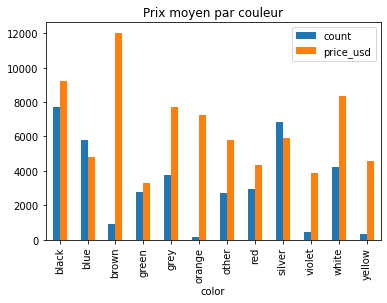

In [14]:
col = cars.color
c = Counter(col)
c = dict( sorted(c.items(), key=lambda x: x[0].lower()) )
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['color','count']).set_index('color')

df = pd.DataFrame(cars.groupby(['color'])['price_usd'].mean())

result = pd.concat([freq, df], axis=1, join='inner')
result.plot.bar()
plt.title('Prix moyen par couleur')

Text(0.5, 1.0, 'Prix moyen par couleur')

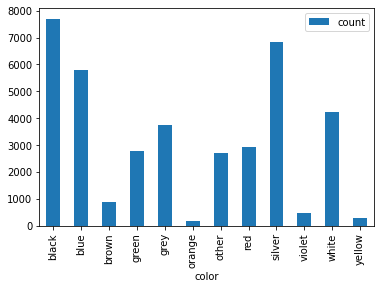

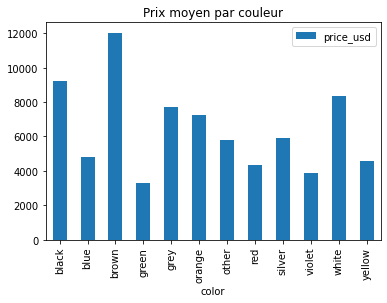

In [15]:
col = cars.color
c = Counter(col)
c = dict( sorted(c.items(), key=lambda x: x[0].lower()) )
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['color','count']).set_index('color')
freq.plot.bar()

df = pd.DataFrame(cars.groupby(['color'])['price_usd'].mean())
df.plot.bar()
plt.title('Prix moyen par couleur')

Les histogrammes suivants nous permettent de visualiser l'année de construction des véhicules. La granse majorité des véhicules de notre dataset ont été construits entre 1990 et 2019. 
Nous pouvons remarquer que plus un véhicule est récent, plus son prix est élevé. Cela n'est cependant pas le cas de la plupart des véhicules construits avant 1970 dont le prix augmente plus leur age est élevé. C'est principalement le cas pour les véhicule construits en 1942, atteignant le prix d'un véhicule moderne.

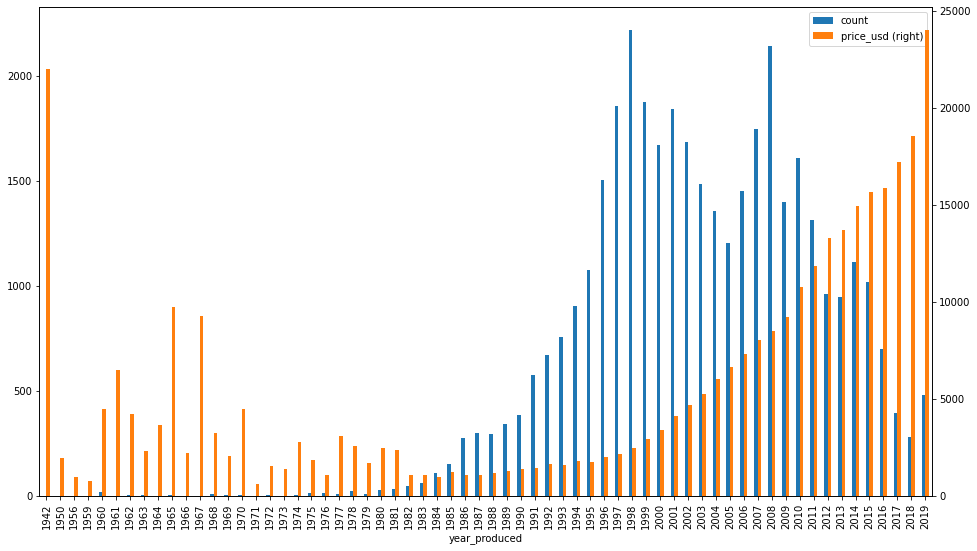

In [54]:
col = cars.year_produced
c = Counter(col)
freq = pd.DataFrame.from_records(list(dict(c).items()), columns=['year_produced','count']).set_index('year_produced')
prix = pd.DataFrame(cars.groupby(['year_produced'])['price_usd'].mean())
df = pd.concat([freq, prix], axis=1, join='inner').sort_index()
df.plot(kind= 'bar', secondary_y='price_usd', xlabel='year_produced', figsize=(16,9))
plt.show()

(array([1.0000e+00, 2.0000e+00, 4.3000e+01, 3.9000e+01, 1.2300e+02,
        1.2870e+03, 4.7250e+03, 1.4155e+04, 1.2238e+04, 5.9180e+03]),
 array([1942. , 1949.7, 1957.4, 1965.1, 1972.8, 1980.5, 1988.2, 1995.9,
        2003.6, 2011.3, 2019. ]),
 <BarContainer object of 10 artists>)

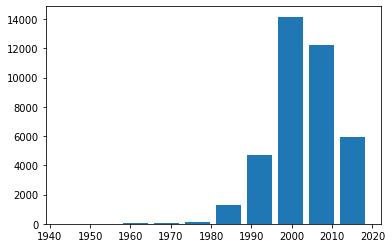

In [17]:
plt.hist(cars.year_produced, bins=10, rwidth=0.8)

Nous nous intéressons ensuite au nombre de photos présentes dans les annonces. Nous pouvons remarquer que la plupart des annonces ont entre 1 à 30 photos, 10 étant la quantité la plus commune.

Il est possible de remarquer que le prix moyen des véhicules augmente avec le nombre de photos disponibles jusqu'à 30, après quoi le prix moyen n'est pas en corrélation avec le nombre de photos.

Text(0.5, 1.0, 'Prix moyen par année')

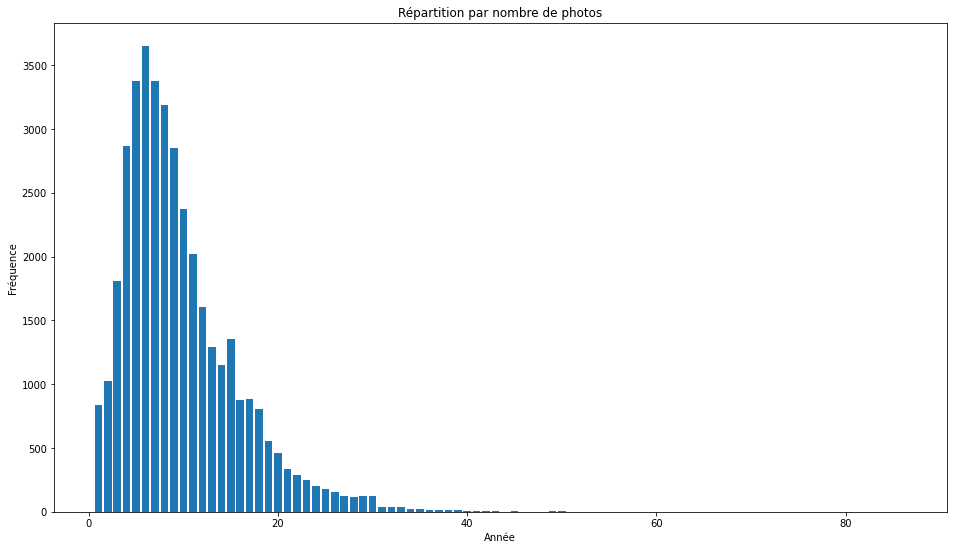

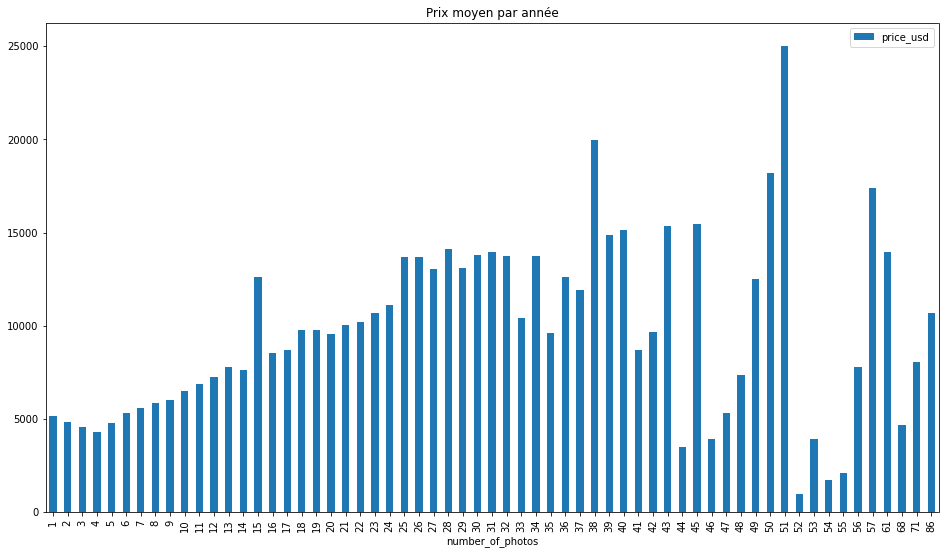

In [18]:
col = cars.number_of_photos
c = Counter(col)
plt.figure(figsize=(16,9))
plt.bar(c.keys(), c.values())
plt.title('Répartition par nombre de photos')
plt.xlabel('Année')
plt.ylabel('Fréquence')

df = pd.DataFrame(cars.groupby(['number_of_photos'])['price_usd'].mean())
df.plot.bar(figsize=(16,9))
plt.title('Prix moyen par année')

Les voitures avec plus de 40 photos sont trop peu nombreuses pour pouvoir en tirer des conclusions

(array([2.982e+03, 4.486e+03, 6.201e+03, 7.922e+03, 8.222e+03, 4.633e+03,
        2.436e+03, 8.610e+02, 2.640e+02, 1.790e+02, 5.000e+01, 3.500e+01,
        1.800e+01, 8.000e+00, 2.340e+02]),
 array([      0.        ,   66666.66666667,  133333.33333333,
         200000.        ,  266666.66666667,  333333.33333333,
         400000.        ,  466666.66666667,  533333.33333333,
         600000.        ,  666666.66666667,  733333.33333333,
         800000.        ,  866666.66666667,  933333.33333333,
        1000000.        ]),
 <BarContainer object of 15 artists>)

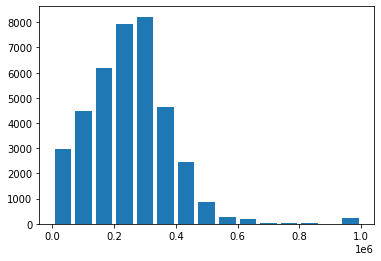

In [19]:
plt.hist(cars.odometer_value, bins=15, rwidth=0.8)